In [1]:
import anndata as ad
import scanpy as sc

In [2]:
adata = ad.read('/home/rhalena/Documents/Documents/MyPapers/FACS/Data/Large9MBO/phenoID/results.h5ad')

In [3]:
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [4]:
adata

AnnData object with n_obs × n_vars = 197160 × 13
    obs: 'leiden_res_0.001_10_nn', 'leiden_res_0.01_10_nn', 'leiden_res_0.015_10_nn', 'leiden_res_0.02_10_nn', 'leiden_res_0.001_12_nn', 'leiden_res_0.01_12_nn', 'leiden_res_0.015_12_nn', 'leiden_res_0.02_12_nn'
    var: 'mean', 'std'
    uns: '10_nn', '12_nn', 'leiden', 'pca'
    obsm: 'X_pca', 'X_umap10_nn', 'X_umap12_nn'
    varm: 'PCs'
    obsp: '10_nn_connectivities', '10_nn_distances', '12_nn_connectivities', '12_nn_distances'

In [5]:
# umap assign the name for each different number of neighbors to visualize
# change 10 into the res you want (if it's there already in the df)
adata.obsm['X_umap'] = adata.obsm['X_umap10_nn']

In [18]:
selected_neighbors_key='10_nn'
leiden_res_key='leiden_res_0.01'

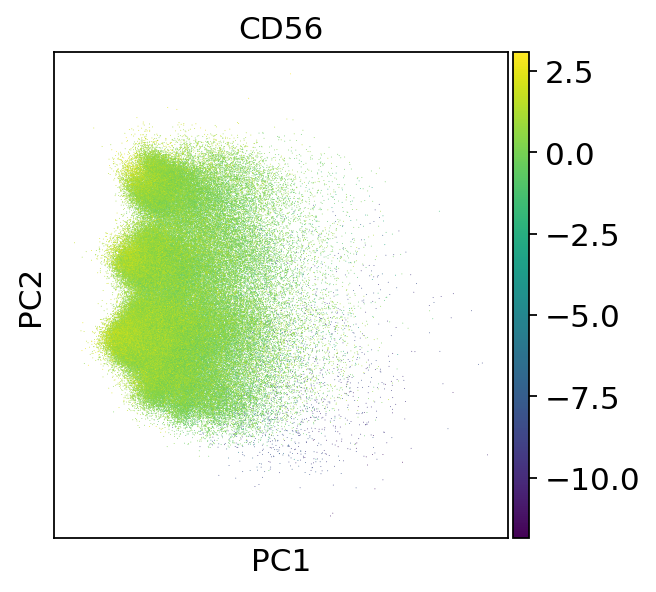

In [6]:
sc.pl.pca(adata, color='CD56')

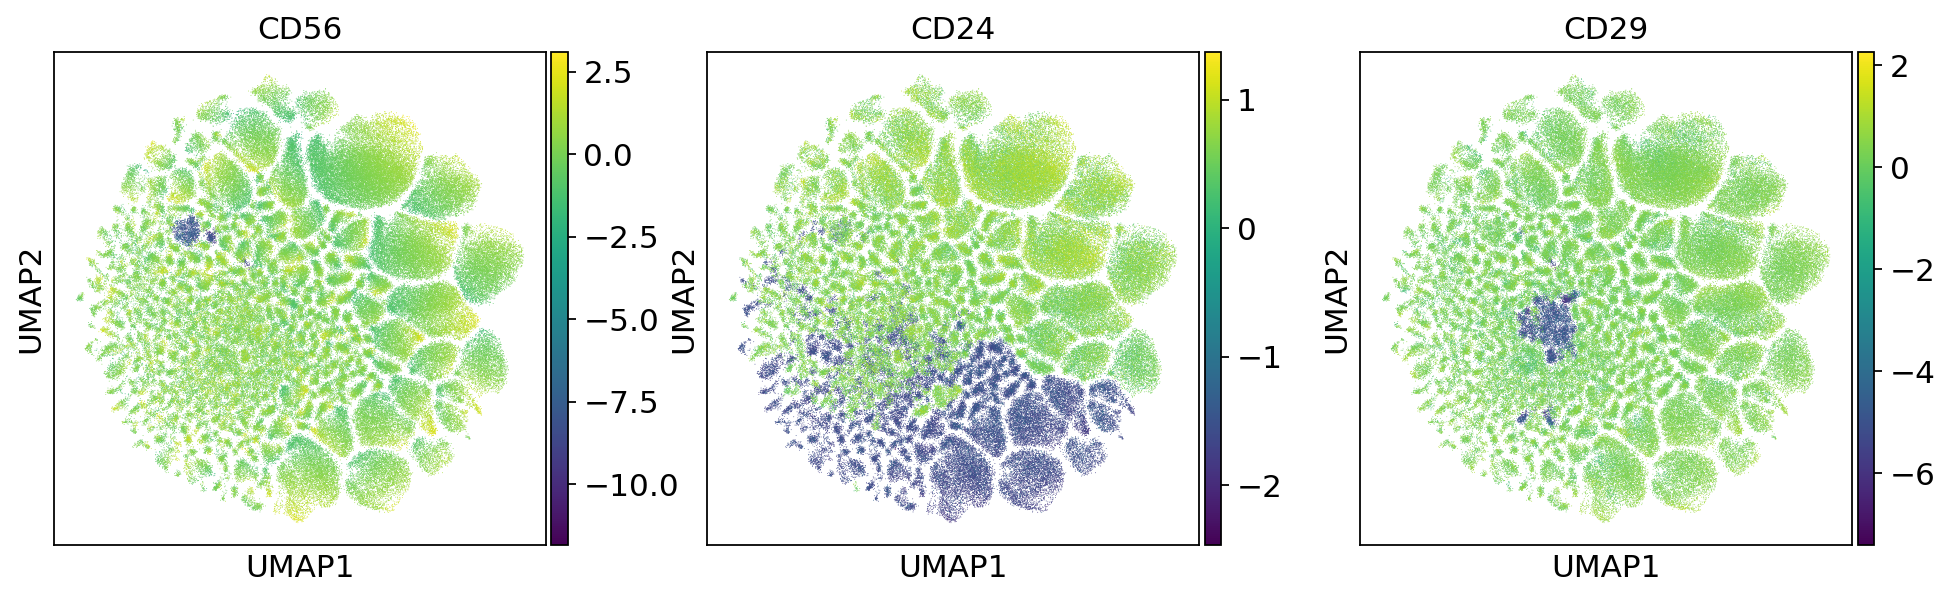

In [10]:
sc.pl.umap(adata, color=['CD56','CD24','CD29'])

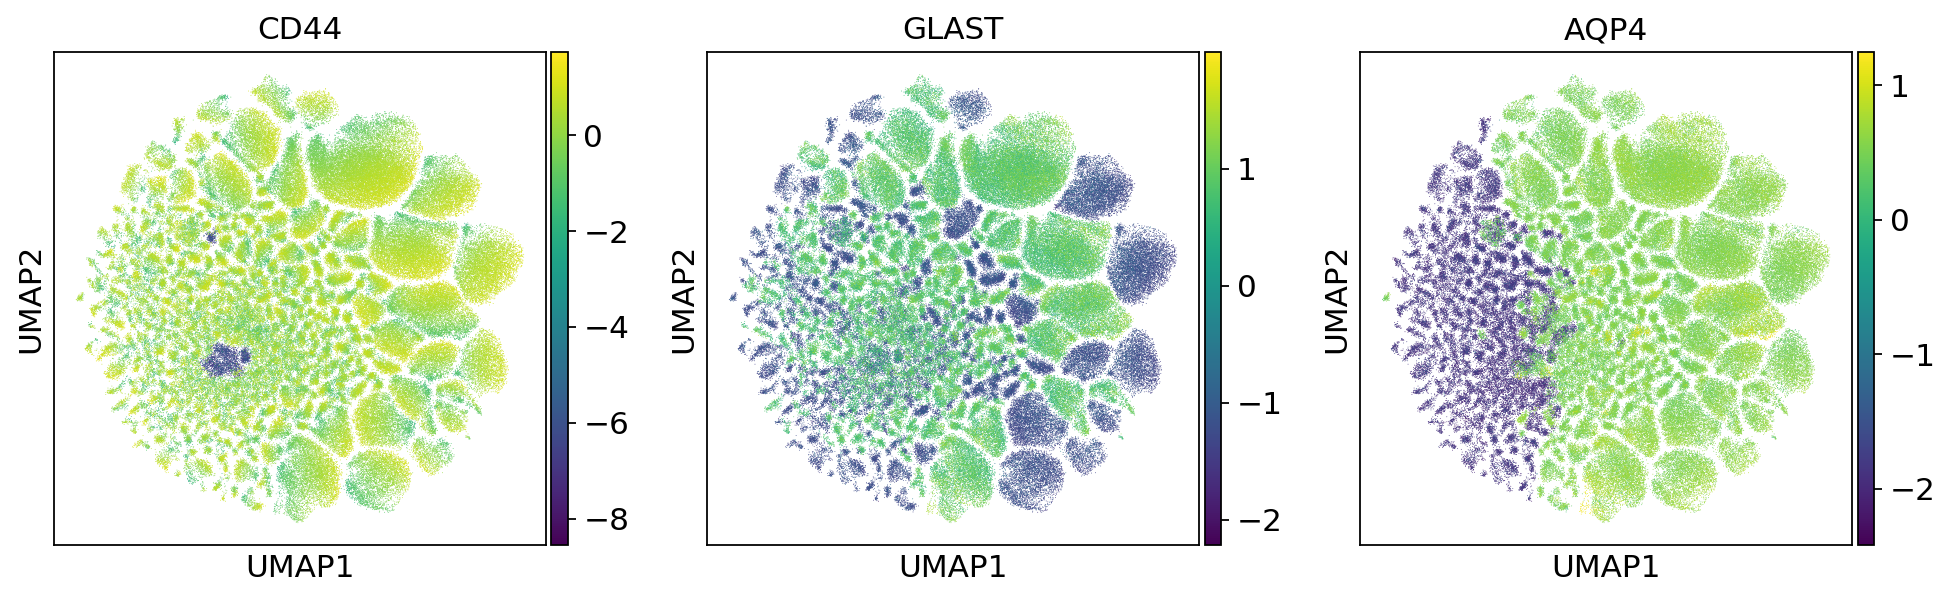

In [11]:
sc.pl.umap(adata, color=['CD44','GLAST','AQP4'])

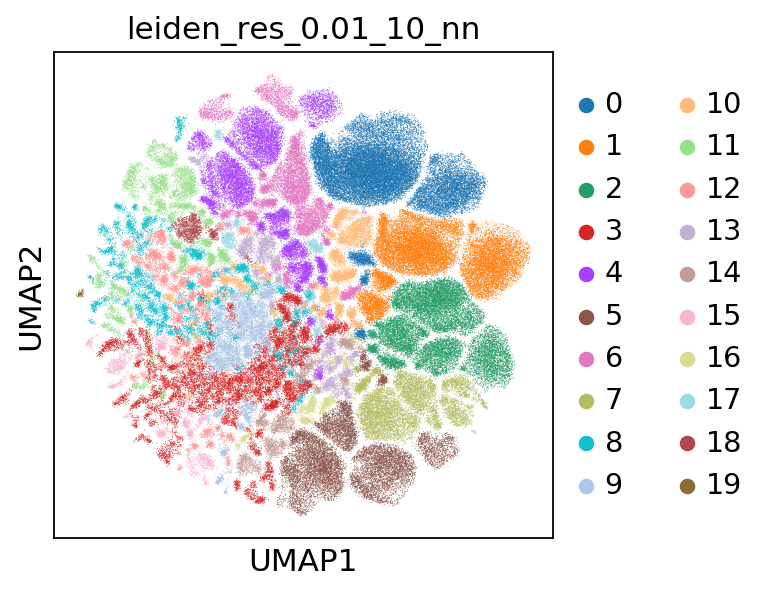

In [19]:
#sc.pl.umap(adata, color='leiden_res_0.01_10_nn') # makes cluster maps
sc.pl.umap(adata, color=leiden_res_key+'_'+selected_neighbors_key)

In [34]:
print(adata.var[:])
groups = leiden_res_key+'_'+selected_neighbors_key
print(groups)
markers = {'AQP4','CD56','CD140a','CD29','CD44','CD184','CD71','CD24','CD15','O4','HepaCAM','CD133'}

              mean       std
AQP4      5.736533  7.553140
CD56      9.048818  1.890757
GLAST     2.253189  6.506998
CD140a   -1.743765  6.583835
CD29      9.180972  2.849052
CD44     10.543011  2.610298
CD184     7.142861  5.293893
CD71      5.070694  6.876270
CD24      4.689132  7.696398
CD15      5.606378  6.487900
O4        5.077583  4.677041
HepaCAM   1.470697  6.953461
CD133     5.905424  6.038269
leiden_res_0.01_10_nn


In [33]:

sc.pl.dotplot(adata, markers, adata.var[:], groupby= groups)

TypeError: dotplot() got multiple values for argument 'groupby'